In [12]:
import clean
import firePCA
import numpy as np
import pandas as pd
from sklearn.preprocessing import normalize
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
wild_fires, ind_var = clean.clean()
pca_reduced = firePCA.firePCA()
cor_reduced = ind_var[:,[0,5]]

ind_var_train = ind_var[:-96]
ind_var_test = ind_var[-96:]

pca_var_train = pca_reduced[:-96]
pca_var_test = pca_reduced[-96:]

cor_var_train = cor_reduced[:-96]
cor_var_test = cor_reduced[-96:]

wild_fires_train = wild_fires[:-96]
wild_fires_test = wild_fires[-96:]



In [18]:
linear_regression = LinearRegression()
linear_regression.fit(ind_var_train, wild_fires_train)
wild_fires_predict = linear_regression.predict(ind_var_test)
wild_fires_predict = np.where(wild_fires_predict < 0, 0, wild_fires_predict)

print('RMSE: %.2f' 
      % mean_squared_error(wild_fires_test, wild_fires_predict, squared=False))
print('R^2: %.5f'
      % r2_score(wild_fires_test, wild_fires_predict))

pca_linear_regression = LinearRegression()
pca_linear_regression.fit(pca_var_train, wild_fires_train)
pca_wild_fires_predict = pca_linear_regression.predict(pca_var_test)
pca_wild_fires_predict = np.where(pca_wild_fires_predict < 0, 0, pca_wild_fires_predict)

print('PCA Reduced RMSE: %.2f' 
      % mean_squared_error(wild_fires_test, pca_wild_fires_predict, squared=False))
print('PCA Reduced R^2: %.5f'
      % r2_score(wild_fires_test, pca_wild_fires_predict))

cor_linear_regression = LinearRegression()
cor_linear_regression.fit(cor_var_train, wild_fires_train)
cor_wild_fires_predict = cor_linear_regression.predict(cor_var_test)
cor_wild_fires_predict = np.where(cor_wild_fires_predict < 0, 0, cor_wild_fires_predict)

print('Coorelation Matrix Reduced RMSE: %.2f' 
      % mean_squared_error(wild_fires_test, cor_wild_fires_predict, squared=False))
print('Coorelation Matrix Reduced R^2: %.5f'
      % r2_score(wild_fires_test, cor_wild_fires_predict))

RMSE: 1412.77
R^2: 0.43393
PCA Reduced RMSE: 1497.34
PCA Reduced R^2: 0.36413
Coorelation Matrix Reduced RMSE: 1415.99
Coorelation Matrix Reduced R^2: 0.43134


Over Line: 40
Under Line: 55
On Line: 1


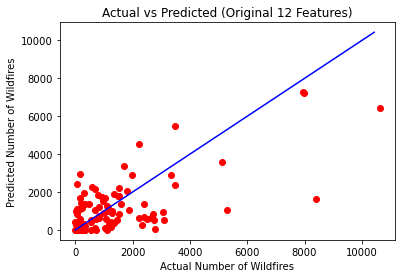

In [33]:
plt.plot(wild_fires_test, wild_fires_predict, 'o', color='red')
plt.xlabel("Actual Number of Wildfires")
plt.ylabel("Predicted Number of Wildfires")
plt.title("Actual vs Predicted (Original 12 Features)")
x = np.linspace(0, 10431, 10431)
plt.plot(x, x, linestyle='solid', color='blue')

over_under = wild_fires_test - wild_fires_predict
over = np.sum(over_under < 0)
print('Over Line: %.0f' %over)
under = np.sum(over_under > 0)
print('Under Line: %.0f' %under)
on = np.sum(over_under == 0)
print('On Line: %.0f' %on)


Over Line: 42
Under Line: 53
On Line: 1


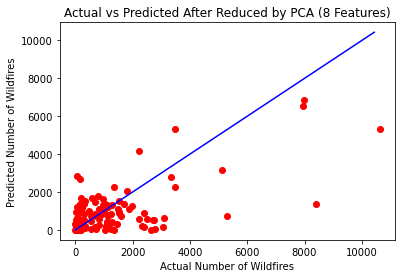

In [34]:
plt.plot(wild_fires_test, pca_wild_fires_predict, 'o', color='red')
plt.xlabel("Actual Number of Wildfires")
plt.ylabel("Predicted Number of Wildfires")
plt.title("Actual vs Predicted After Reduced by PCA (8 Features)")
x = np.linspace(0, 10431, 10431)
plt.plot(x, x, linestyle='solid', color='blue')

pca_over_under = wild_fires_test - pca_wild_fires_predict
pca_over = np.sum(pca_over_under < 0)
print('Over Line: %.0f' %pca_over)
pca_under = np.sum(pca_over_under > 0)
print('Under Line: %.0f' %pca_under)
pca_on = np.sum(pca_over_under == 0)
print('On Line: %.0f' %pca_on)

Over Line: 43
Under Line: 53
On Line: 0


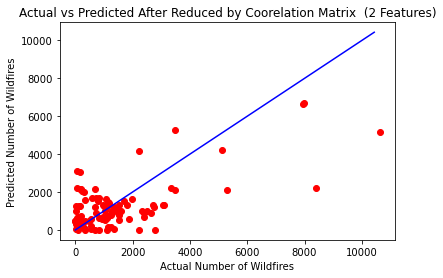

In [39]:
plt.plot(wild_fires_test, cor_wild_fires_predict, 'o', color='red')
plt.xlabel("Actual Number of Wildfires")
plt.ylabel("Predicted Number of Wildfires")
plt.title("Actual vs Predicted After Reduced by Coorelation Matrix  (2 Features)")
x = np.linspace(0, 10431, 10431)
plt.plot(x, x, linestyle='solid', color='blue')

cor_over_under = wild_fires_test - cor_wild_fires_predict
cor_over = np.sum(cor_over_under < 0)
print('Over Line: %.0f' %cor_over)
cor_under = np.sum(cor_over_under > 0)
print('Under Line: %.0f' %cor_under)
cor_on = np.sum(cor_over_under == 0)
print('On Line: %.0f' %cor_on)

Text(0.5, 0.92, 'Number of Wildfires based on Average Temperature and Population')

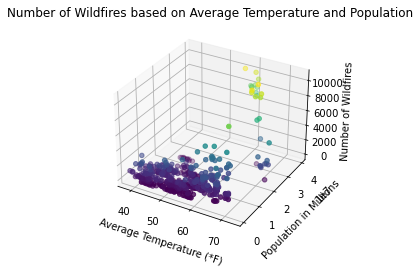

In [36]:
fig = plt.figure()
ax = plt.axes(projection='3d')
zdata = wild_fires
xdata = cor_reduced[:,0]
ydata = cor_reduced[:,1]
ax.scatter3D(xdata, ydata, zdata, c=zdata)
ax.set_xlabel("Average Temperature (*F)")
ax.set_ylabel("Population in Millions")
ax.set_zlabel("Number of Wildfires")
ax.set_title("Number of Wildfires based on Average Temperature and Population")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RMSE: 0.14
Coefficient of determination: 0.47826


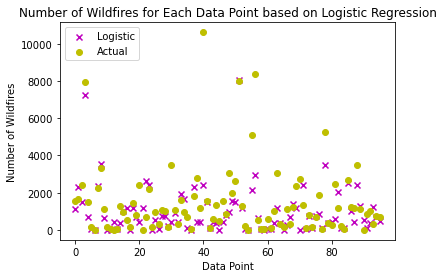

In [40]:
wild_fires, ind_var = clean.clean()
ind_1 = ind_var[:,:5]
ind_pop = normalize(ind_var[:,5].reshape(-1,1))
ind_2 = ind_var[:,6:]
ind_var = np.concatenate((ind_1, ind_pop, ind_2), axis = 1)
ind_var_train = ind_var[:-96,:]
ind_var_test = ind_var[-96:,:]

wild_fires_train = wild_fires[:-96]
wild_fires_test = wild_fires[-96:]

logistic_regression = LogisticRegression()
wild_fires_train = wild_fires_train.flatten()
logistic_regression.fit(ind_var_train, wild_fires_train)
logistic_results = logistic_regression.predict(ind_var_test)
print('RMSE: %.2f' 
      % mean_squared_error(normalize(logistic_results.reshape(-1,1)), normalize(wild_fires_test.reshape(-1,1)), squared=False))
print('Coefficient of determination: %.5f'
      % r2_score(normalize(logistic_results.reshape(-1,1)), normalize(wild_fires_test.reshape(-1,1))))

fig = plt.figure()
ax1 = fig.add_subplot(111)
x_list = np.array([i for i in range(96)])
ax1.scatter(x_list,logistic_results, c='m', marker="x", label='Logistic')
ax1.scatter(x_list,wild_fires_test, c='y', marker="o", label='Actual')

plt.xlabel("Data Point")
plt.ylabel("Number of Wildfires")
plt.title("Number of Wildfires for Each Data Point based on Logistic Regression")

plt.legend(loc='upper left');
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RMSE: 0.18
Coefficient of determination: 0.36703


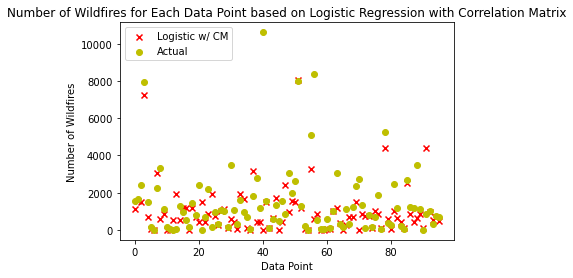

In [41]:
ind_cm = np.concatenate((ind_1[:,:5],normalize(ind_var[:,5].reshape(-1,1)),ind_2[:,0].reshape(-1,1)),axis=1)
ind_var_train_cm = ind_cm[:-96,:]
ind_var_test_cm = ind_cm[-96:,:]

logistic_regression_cm = LogisticRegression()
logistic_regression_cm.fit(ind_var_train_cm, wild_fires_train)
logistic_results_cm = logistic_regression_cm.predict(ind_var_test_cm)

print('RMSE: %.2f' 
      % mean_squared_error(normalize(logistic_results_cm.reshape(-1,1)), normalize(wild_fires_test.reshape(-1,1)), squared=False))
print('Coefficient of determination: %.5f'
      % r2_score(normalize(logistic_results_cm.reshape(-1,1)), normalize(wild_fires_test.reshape(-1,1))))

fig = plt.figure()
ax1 = fig.add_subplot(111)
x_list = np.array([i for i in range(96)])
ax1.scatter(x_list,logistic_results_cm, c='r', marker="x", label='Logistic w/ CM')
ax1.scatter(x_list,wild_fires_test, c='y', marker="o", label='Actual')

plt.xlabel("Data Point")
plt.ylabel("Number of Wildfires")
plt.title("Number of Wildfires for Each Data Point based on Logistic Regression with Correlation Matrix")

plt.legend(loc='upper left');
plt.show()